In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np

**KNN classification**

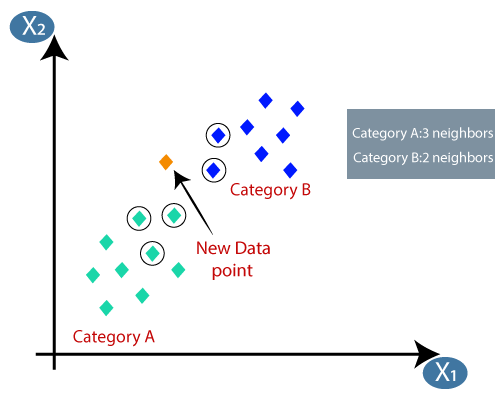

Dataset Generation and Visualization

HW 9 P2 dataset

p(S_1) = 0.5, p(S_2) = 0.5

In [48]:
def dataset_generation(num):
    X = []
    y = []
    for _ in range(num):
        if(np.random.uniform() <= 0.5):
            y.append(1) # class 1
            if np.random.uniform() < 0.5:
                X.append(np.random.multivariate_normal([-4, 0], [[4, 0], [0, 1]], size=1))
            else:
                X.append(np.random.uniform(low=[0, -1], high=[2, 1], size=(1, 2)))
        else:
            y.append(2) # class 1
            X.append(np.random.multivariate_normal([-0.5, 0], [[0.16, 0], [0, 9]], size=1))
    return np.row_stack(X), np.asarray(y)

In [49]:
X_train, y_train = dataset_generation(1000)
X_test, y_test = dataset_generation(200)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(1000, 2) (1000,)
(200, 2) (200,)


<AxesSubplot: >

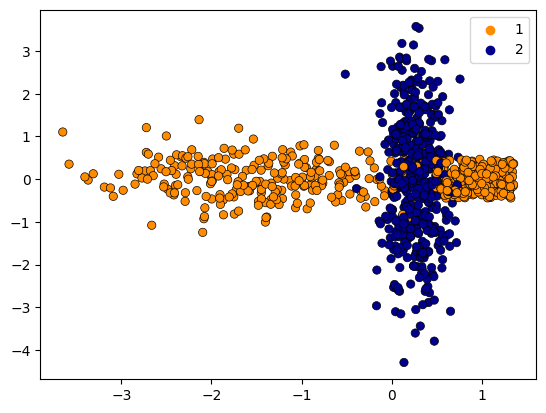

In [50]:
cmap_bold = ["darkorange", "darkblue"]
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)

KNN classification and visualization

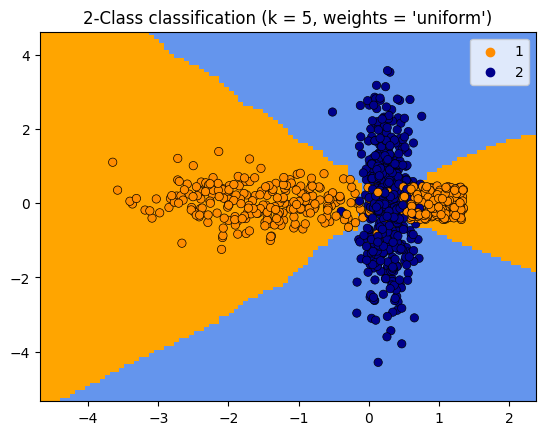

In [51]:
n_neighbors = 5 #k
weights = "uniform" # ["uniform", "distance"]:
# Create color maps
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X_train, y_train)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    # xlabel=iris.feature_names[0],
    # ylabel=iris.feature_names[1],
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.title(
    "2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
)
plt.show()

Hyper-parameters

Too small K gives overfitting

Too large K gives underfitting

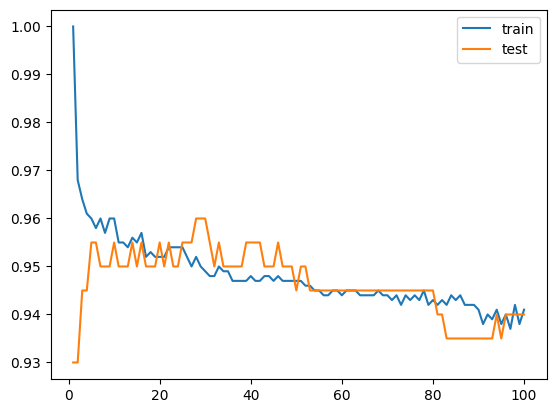

In [52]:
k_values = [i for i in range (1,101)]
train_acc = []
test_acc = []

weights = 'uniform'
for k in k_values:
    clf = neighbors.KNeighborsClassifier(k, weights=weights)
    clf.fit(X_train, y_train)

    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(k_values, train_acc, label="train")
plt.plot(k_values, test_acc, label="test")
plt.legend()
plt.show()
